# 1.7 Integración numérica

Este libro es para la parte de código de la [sección 1.7 de las notas](https://itam-ds.github.io/analisis-numerico-computo-cientifico/1.computo_cientifico/1.7/Integracion_numerica.html).

La función `quad` es un algoritmo implementado por scipy que se usa para calcular la integral definida de una función.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad

# Newton-Cotes
**Ejemplo**:
<br>En las siguientes reglas se considerará la función $f(x)=e^{-x^2}$ la cual tiene una forma:

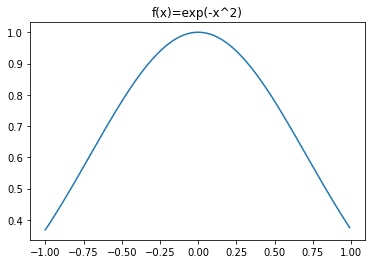

In [2]:
#Se define la función por integrar
f = lambda x: np.exp(-x**2)

#Se definen los puntos por evaluar
x = np.arange(-1,1,.01)

#Gráfica de la función
plt.plot(x, f(x))
plt.title('f(x)=exp(-x^2)')

plt.show()

In [3]:
obj, err = quad(f, 0, 1)
obj, err

(0.7468241328124271, 8.291413475940725e-15)

## Regla simple del rectángulo
**Ejemplo**:
<br>Utilizar la regla simple del rectángulo para aproximar la integral: $\int_{0}^{1}e^{-x^2}{dx}$

In [4]:
def Rf(f,a,b):
    """
    Compute numerical approximation using simple rectangle or midpoint method in 
    an interval.
    """
    node = a + (b - a)/2.0 #mid point formula to minimize rounding errors
    return f(node) #zero degree polynomial

rf_simple = Rf(f,0,1)
print(f"Aprx. Integral, rect. simple: {rf_simple:.6f}")

Aprx. Integral, rect. simple: 0.778801


### Calculando el error

In [5]:
def compute_error(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if math.fabs(obj) > np.nextafter(0,1):
        Err = math.fabs(obj-approx)/math.fabs(obj)
    else:
        Err = math.fabs(obj-approx)
    return Err

rf_err = compute_error(obj, rf_simple)
print(f"Rect. simple error: {rf_err * 100:.6f}%")

Rect. simple error: 4.281684%


## Regla compuesta del rectángulo
**Ejemplo**:
<br>Utilizar la regla compuesta del rectángulo para aproximar la integral: $\int_{0}^{1}e^{-x^2}{dx}$

In [6]:
def Rcf(f,a,b,n):
    """
    Compute numerical approximation using rectangle or mid-point
    method in an interval.
    Nodes are generated via formula: x_i = a+(i+1/2)h_hat for
    i=0,1,...,n-1 and h_hat=(b-a)/n
    Args:
    
        f (function): function expression of integrand.
        
        a (float): left point of interval.
        
        b (float): right point of interval.
        
        n (float): number of subintervals.
        
    Returns:
    
        sum_res (float): numerical approximation to integral
            of f in the interval a,b
    """
    h_hat = (b - a)/n
    nodes = [a + (i+1/2) * h_hat for i in range(0,n)]
    sum_res = 0
    for node in nodes:
        sum_res = sum_res + f(node)
    return h_hat * sum_res

**1 nodo**:

In [7]:
n = 1
a, b = 0, 1

#Evaluando rcf
rcf_1 = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 1 nodo: {rcf_1:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 1 nodo: 0.778801


**2 nodos**:

In [8]:
n = 2
a, b = 0, 1

#Evaluando rcf
rcf_2 = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 2 nodo: {rcf_2:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 2 nodo: 0.754598


**$10^3$ nodo**:

In [9]:
n = int(1e3)
a, b = 0, 1

#Evaluando rcf
rcf_n = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 1e3 nodo: {rcf_n:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 1e3 nodo: 0.746824


### Calculando el error

In [10]:
rcf_err_1 = compute_error(obj, rcf_1)
rcf_err_2 = compute_error(obj, rcf_2)
rcf_err_n = compute_error(obj, rcf_n)

rcf_dict = {"Aproximaciones Rcf": ["Rcf_1", "Rcf_2", "Rcf_3"],
            "Número de nodos" : [1, 2, 1e3],
            "Errores relativos": [rcf_err_1, rcf_err_2, rcf_err_n]}

pd.DataFrame(rcf_dict)

,Aproximaciones Rcf,Número de nodos,Errores relativos
0,Rcf_1,1.0,4.281684e-02
1,Rcf_2,2.0,1.040916e-02
2,Rcf_3,1000.0,4.104932e-08


**Evaluando** el error utilizando `pytest`

In [11]:
from pytest import approx

In [12]:
print(f"Regla comp. rect. 1 nodos: {rcf_1 == approx(obj)}")
print(f"Regla comp. rect. 2 nodos: {rcf_2 == approx(obj)}")
print(f"Regla comp. rect. n nodos: {rcf_n == approx(obj)}")

Regla comp. rect. 1 nodos: False
Regla comp. rect. 2 nodos: False
Regla comp. rect. n nodos: True


**Bajando** la tolerancia 

In [13]:
print(f"Regla comp. rect. 1 nodos: {rcf_1 == approx(obj, abs=1e-1, rel=1e-1)}")
print(f"Regla comp. rect. 2 nodos: {rcf_2 == approx(obj, abs=1e-1, rel=1e-1)}")
print(f"Regla comp. rect. n nodos: {rcf_n == approx(obj, abs=1e-1, rel=1e-1)}")

Regla comp. rect. 1 nodos: True
Regla comp. rect. 2 nodos: True
Regla comp. rect. n nodos: True


### Pregunta
¿Es el método del rectángulo un método estable numéricamente bajo el redondeo? Para responder, se aproxima la integral con un mayor número de nodos.

In [14]:
n = int(1e5)
rcf_4 = Rcf(f, a, b, n)
rcf_err_4 = compute_error(obj, rcf_4)

print(f"Aprx. rect. comp. 1e3 nodo: {rcf_err_n:e}")
print(f"Aprx. rect. comp. 1e5 nodo: {rcf_err_4:e}")

Aprx. rect. comp. 1e3 nodo: 4.104932e-08
Aprx. rect. comp. 1e5 nodo: 4.099427e-12


El error bajó aún más con una $h$ más pequeña $\therefore$ el problema es numéricamente estable.

## Regla compuesta del trapecio
**Ejemplo**:
<br>Con la regla compuesta del trapecio se aproximará la integral $\int_{0}^{1}e^{-x^2}{dx}$.
<br>Se calculará el error relativo y graficará $n_{sub}$ vs Error relativo para $n_{sub}=[1,10,...,10^4]$.

In [15]:
def Tcf(n,f,a,b): #Tcf: trapecio compuesto para f
    """
    Compute numerical approximation using trapezoidal method in 
    an interval.
    Nodes are generated via formula: x_i = a+ih_hat for i=0,1,...,n and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    h = b-a
    nodes = np.linspace(a,b,n+1)
    sum_res = sum(f(nodes[1:-1]))
    return h/(2*n) * ( f(nodes[0]) + f(nodes[-1]) + 2*sum_res )


def compute_error_point_wise(obj, approx):
    '''
    Relative or absolute error between obj and approx (Element wise).
    '''
    if np.abs(obj) > np.nextafter(0,1):
        Err = np.abs(obj - approx)/np.abs(obj)
    else:
        Err = np.abs(obj - approx)
    return Err

In [16]:
#Subintervalos
numb_of_subintervals = (1,10,100,1000,10000)

#Evaluando la integral
tcf_approx = np.array([ Tcf(n,f,0,1) for n in numb_of_subintervals ])
for i in range(len(numb_of_subintervals)):
    print(f"Aprx. trap. compuesto con {numb_of_subintervals[i]:,} intervalos: {tcf_approx[i]:.6f}")

Aprx. trap. compuesto con 1 intervalos: 0.683940
Aprx. trap. compuesto con 10 intervalos: 0.746211
Aprx. trap. compuesto con 100 intervalos: 0.746818
Aprx. trap. compuesto con 1,000 intervalos: 0.746824
Aprx. trap. compuesto con 10,000 intervalos: 0.746824


In [17]:
#Calculando el error
relative_errors = compute_error_point_wise(obj, tcf_approx)
relative_errors

array([8.42024373e-02, 8.21259857e-04, 8.20989064e-06, 8.20986364e-08,
       8.20987410e-10])

**Graficando** el error

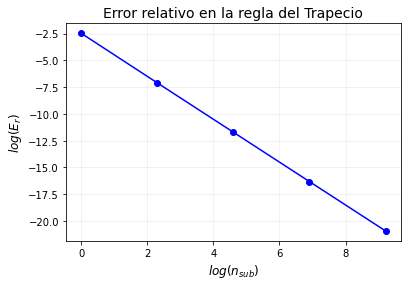

In [18]:
plt.plot(np.log(numb_of_subintervals), np.log(relative_errors), 'o-', c='b')

#Anotaciones y estilo
plt.xlabel('$log(n_{sub})$', fontsize=12)
plt.ylabel('$log({E}_{r})$', fontsize=12)
plt.title('Error relativo en la regla del Trapecio', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

Nuevamente el error baja con una $h$ más pequeña $\therefore$ se compreba que el problema es numéricamente estable.

## Ejercicio: Regla compuesta de Simpson
<br>Utilizando lenguajes de programación, implementar la regla compuesta de Simpson para aproximar la integral $\int_{0}^{1}e^{-x^2}{dx}$.
<br>Calcular error relativo y realizar una gráfica de $n$ vs Error relativo para $n=[1,10,...,10^4]$.

In [19]:
def Scf(n,f,a,b): #Tcf: trapecio compuesto para f
    """
    Compute numerical approximation using simpson method in 
    an interval.
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    h = b - a
    nodes = np.linspace(a,b,2*n + 1)
    nodes_impar = np.array([nodes[i] for i in range(nodes.shape[0]) if i%2 == 0])
    nodes_par = nodes[~np.isin(element=nodes, test_elements=nodes_impar)]
    
    return h/(3*2*n) * ( f(nodes[0]) + f(nodes[-2]) + 2*sum(f(nodes_par)) + 4*sum(f(nodes_impar)) )

In [20]:
#Subintervalos
numb_of_subintervals = (1,10,100,1000,10000)

#Evaluando la integral
scf_approx = np.array([ Scf(n,f,0,1) for n in numb_of_subintervals ])
for i in range(len(numb_of_subintervals)):
    print(f"Aprx. trap. compuesto con {numb_of_subintervals[i]:,} intervalos: {scf_approx[i]:.6f}")

Aprx. trap. compuesto con 1 intervalos: 1.467987
Aprx. trap. compuesto con 10 intervalos: 0.815539
Aprx. trap. compuesto con 100 intervalos: 0.753667
Aprx. trap. compuesto con 1,000 intervalos: 0.747508
Aprx. trap. compuesto con 10,000 intervalos: 0.746893


In [21]:
#Calculando el error
relative_errors = compute_error_point_wise(obj, scf_approx)
relative_errors

array([9.65639059e-01, 9.20099445e-02, 9.16210100e-03, 9.15838633e-04,
       9.15801668e-05])

**Graficando** el error

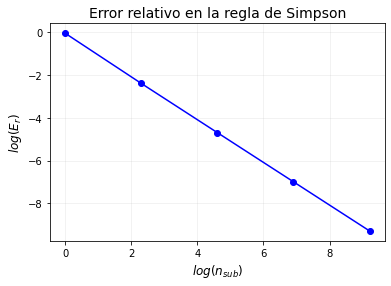

In [22]:
plt.plot(np.log(numb_of_subintervals), np.log(relative_errors), 'o-', c='b')

#Anotaciones y estilo
plt.xlabel('$log(n_{sub})$', fontsize=12)
plt.ylabel('$log({E}_{r})$', fontsize=12)
plt.title('Error relativo en la regla de Simpson', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

# Monte Carlo
**Ejemplo**:
<br>Supóngase que se desea aproximar el área de un círculo centrado en el origen de radio igual a $1$,  entonces el área de este círculo es $\pi r^2=\pi$. Para lo anterior, se **inscribe** la circuenferencia en un cuadrado de lado $2$:

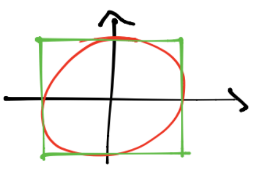

Si se tienen $n$ pñuntos en el cuadrado, y consideramos únicamente los $m$ puntos que están dentro de la circuinferencia:

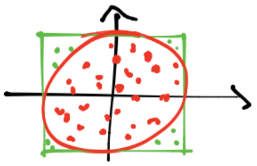

Entonces $\frac{A_{círculo}}{A_{cuadrado}}\approx\frac{m}{n}\therefore A_{círculo}\approx A_{cuadrado}\frac{m}{n}$, y si $n\rightarrow\infty$, entonces la aproximación es exacta.

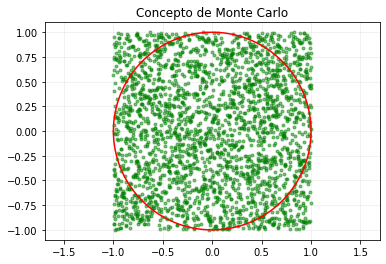

In [23]:
#Muestra de una distribución uniforme
density_p = int(2.5e3)
x_p = np.random.uniform(low=-1, high=1, size=(density_p,2))

#Circunferencia unitaria
density = 1e-5
x = np.arange(-1, 1, density)
y1 = np.sqrt(1 - x**2)
y2 = -np.sqrt(1 - x**2)

#Graficando
plt.scatter(x_p[:,0],x_p[:,1],marker='.',color='g', alpha=0.5)
plt.plot(x, y1, 'r', x, y2, 'r')

#Anotaciones y estilo
plt.title('Concepto de Monte Carlo')
plt.grid(alpha=0.2)
plt.axis("equal")
plt.show()

Entonces

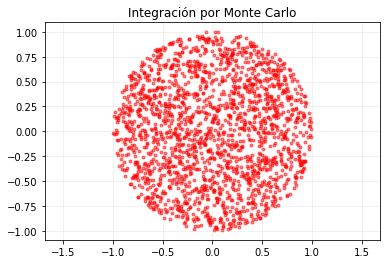

In [24]:
#Definición de norma 2
f = lambda x: np.sqrt(x[:,0]**2 + x[:,1]**2)

#Muestra de distribución uniforme que satisfaga r <= 1
ind = f(x_p) <= 1
x_p_subset = x_p[ind]

#Graficando
plt.scatter(x_p_subset[:,0], x_p_subset[:,1], marker='.', color='r', alpha=0.5)

#Anotaciones y estilo
plt.title('Integración por Monte Carlo')
plt.grid(alpha=0.2)
plt.axis("equal")

plt.show()

El **área** de la circunferencia queda dada por:

In [25]:
square_area = 2**2
print(f"Área circunferencia unitaria: {square_area * len(x_p_subset)/len(x_p):.6f}")

Área circunferencia unitaria: 3.115200


Aumentando el número de puntos

In [26]:
#Muestra de dist. uniforme
density_p = int(1e4)
x_p = np.random.uniform(low=-1, high=1, size=(density_p,2))

#Aprox. Monte Carlo
ind = f(x_p) <= 1
x_p_subset = x_p[ind]

print(f"Aprx. área circ. unit., n={density_p:,}: {square_area * len(x_p_subset)/len(x_p):.6f}")

Aprx. área circ. unit., n=10,000: 3.126400


In [27]:
#Muestra de dist. uniforme
density_p = int(1e6)
x_p = np.random.uniform(low=-1, high=1, size=(density_p,2))

#Aprox. Monte Carlo
ind = f(x_p) <= 1
x_p_subset = x_p[ind]

print(f"Aprx. área circ. unit., n={density_p:,}: {square_area * len(x_p_subset)/len(x_p):.6f}")

Aprx. área circ. unit., n=1,000,000: 3.143292


**Ejemplos**:
<br>Calcular para una densidad de puntos $d_p={10}^4$ las siguientes integrales:

In [28]:
density_p = int(1e4)

* $\int_{0}^{1}\frac{4}{1+x^2}{dx}=\pi$

In [29]:
#Función a integrar
f = lambda x: 4/(1 + x**2)

#Valor objetivo
obj = np.pi

#Aproximación Monte Carlo
a, b = 0, 1
x_p = np.random.uniform(low=a, high=b, size=density_p)
aprx_mc = (b-a) * np.mean(f(x_p))

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	3.141592653589793
aprx:	3.1414347531085363


In [30]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 5.026128e-05


* $\int_{1}^{2}\frac{1}{x}{dx}=log(2)$

In [31]:
#Función a integrar
f = lambda x: 1/x

#Valor objetivo
obj = np.log(2)

#Aproximación Monte Carlo
a, b = 1, 2
x_p = np.random.uniform(low=a, high=b, size=density_p)
aprx_mc = (b-a) * np.mean(f(x_p))

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	0.6931471805599453
aprx:	0.6906190433561799


In [32]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 3.647331e-03


* $\int_{-1}^{1}\int_{0}^{1}x^2+y^2{dx}{dy}=\frac{4}{3}$

In [33]:
#Función a integrar
f = lambda x, y: x**2 + y**2

#Valor objetivo
obj = 4/3

#Aproximación Monte Carlo
a1, b1 = -1, 1
a2, b2 = 0, 1
vol = (b1-a1) * (b2-a2)
x_p = np.random.uniform(low=a1, high=b1, size=density_p)
y_p = np.random.uniform(low=a2, high=b2, size=density_p)
aprx_mc = vol * np.mean(f(x_p, y_p))

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	1.3333333333333333
aprx:	1.321615260863883


In [34]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 8.788554e-03


* $\int_{0}^{\frac{\pi}{2}}\int_{0}^{\frac{\pi}{2}}{cos}(x){sin}(y){dx}{dy}=1$

In [35]:
#Función a integrar
f = lambda x, y: np.cos(x) * np.sin(y)

#Valor objetivo
obj = 1

#Aproximación Monte Carlo
a1, b1 = 0, np.pi/2
a2, b2 = 0, np.pi/2
vol = (b1-a1) * (b2-a2)
x_p = np.random.uniform(low=a1, high=b1, size=density_p)
y_p = np.random.uniform(low=a2, high=b2, size=density_p)
aprx_mc = vol * np.mean(f(x_p, y_p))

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	1
aprx:	0.9955827146499334


In [36]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 4.417285e-03


* $\int_{0}^{1} \int_{-\frac{1}{2}}^{0} \int_{0}^{\frac{1}{3}}(x+2y+3z)^2{dx}{dy}{dz}=\frac{1}{12}$

In [37]:
#Función a integrar
f = lambda x, y, z: (x + 2*y + 3*z)**2

#Valor objetivo
obj = 1/12

#Aproximación Monte Carlo
ax, bx = 0, 1
ay, by = -1/2, 0
az, bz = 0, 1/3
vol = (bx-ax) * (by-ay) * (bz-az)
x_p = np.random.uniform(low=ax, high=bx, size=density_p)
y_p = np.random.uniform(low=ay, high=by, size=density_p)
z_p = np.random.uniform(low=az, high=bz, size=density_p)
aprx_mc = vol * np.mean(f(x_p, y_p, z_p))

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	0.08333333333333333
aprx:	0.08142401207549187


In [38]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 2.291186e-02


## Calculando el error
**Ejemplo**:
<br>Para el ejemplo anterior $\int_{0}^{1}\frac{4}{1+x^2}{dx}=\pi$ se tiene:

In [39]:
#Función a integrar
f = lambda x: 4/(1 + x**2)

#Valor objetivo
obj = np.pi

#Aproximación Monte Carlo
a, b = 0, 1
x_p = np.random.uniform(low=a, high=b, size=density_p)
f_bar = np.mean(f(x_p))
aprx_mc = (b-a) * f_bar

print(f"obj:\t{obj}\naprx:\t{aprx_mc}")

obj:	3.141592653589793
aprx:	3.142648338524191


In [40]:
#Error relativo
rel_err = compute_error(obj, aprx_mc)
print(f"rel. error: {rel_err:e}")

rel. error: 3.360350e-04


**Determinando** el error estándar, entonces tengo que repetir la integración Monte Carlo una gran cantidad de veces, por ejemplo $1,000$ iteraciones

In [41]:
#Aproximación Monte Carlo
dist_muest_mc = []
for _ in range(1000):
    x_p = np.random.uniform(low=a, high=b, size=density_p)
    aprx_mc = (b-a) * np.mean(f(x_p))
    
    dist_muest_mc.append(aprx_mc)
    
mean_aprx_mc = np.mean(dist_muest_mc)

**Graficando** su distribución muestral

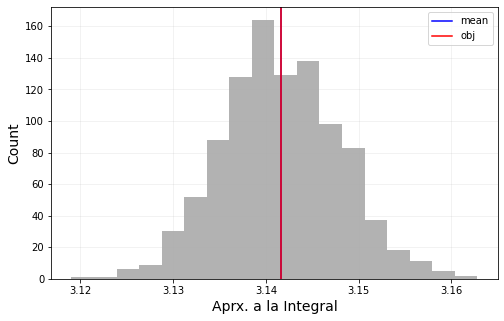

In [42]:
plt.figure(figsize=(8,5))

plt.hist(dist_muest_mc, bins=18, color='black', alpha=0.3)
plt.axvline(x=mean_aprx_mc, ymin=0, ymax=140, c='blue', label='mean')
plt.axvline(x=obj, ymin=0, ymax=140, c='red', label='obj')

#Anotaciones y estilo global
plt.xlabel('Aprx. a la Integral', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)
plt.legend()

plt.show()

In [43]:
std_err = np.array(dist_muest_mc).std()
print(f"Error estándar: {std_err:e}")

Error estándar: 6.384678e-03


**Calculando** el intervalo de confianza, dado que la distribuición muestral es aproximadamente normal, entonces:

In [44]:
left_inteval = mean_aprx_mc - (b-a)*std_err
right_inteval = mean_aprx_mc + (b-a)*std_err

left_inteval, right_inteval

(3.1352449082656406, 3.1480142651524403)

## Ejercicios
Utilizando lenguajes de programación, aproximar, reportar errores relativos e intervalo de estimación en una tabla:

## Aproximación de características de viariables aleatorias
**Ejemplo**:
<br><br>Calcular para una densidad de puntos $d_p={10}^3$ las siguientes integrales:
* $\int_{\infty^-}^{\infty^+}\frac{1}{\sqrt{2\pi}}{exp}(-\frac{{(x-5)}^2}{2}){dx}=1$

In [45]:
#Función de transformación
h = lambda x: 1

In [46]:
#Muestra tamaño n de una normal centrada en 5 con std 1
n = int(1e3)
normal_rvs = np.random.normal(loc=5, scale=1, size=n)

In [47]:
#Aproximación monte carlo
np.mean(h(normal_rvs))

1.0

* $\int_{\infty^-}^{\infty^+}x\frac{1}{\sqrt{2\pi}}{exp}(-\frac{{(x-5)}^2}{2}){dx}=5$

In [48]:
#Función de transformación
h = lambda x: x

In [49]:
#Muestra tamaño n de una normal centrada en 5 con std 1
n = int(1e3)
normal_rvs = np.random.normal(loc=5, scale=1, size=n)

In [50]:
#Aproximación monte carlo
np.mean(h(normal_rvs))

5.039583007913983

* $\int_{\infty^-}^{\infty^+}x^2\frac{1}{\sqrt{2\pi}}{exp}(-\frac{{(x-5)}^2}{2}){dx}=1+5^2$

In [51]:
#Función de transformación
h = lambda x: x**2

In [52]:
#Muestra tamaño n de una normal centrada en 5 con std 1
n = int(1e3)
normal_rvs = np.random.normal(loc=5, scale=1, size=n)

In [53]:
#Aproximación monte carlo
np.mean(h(normal_rvs))

25.974425172742265

**Graficando** la convergencia del valor de la integral por aproximaciones Monte Carlo

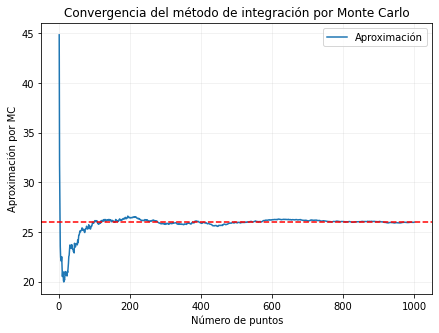

In [54]:
iteraciones = np.arange(n) + 1
cumulative_mean = np.cumsum(h(normal_rvs)) / iteraciones

#Graficando
plt.figure(figsize=(7,5))
plt.plot(iteraciones, cumulative_mean)
plt.axhline(y=np.mean(h(normal_rvs)), xmin=0, xmax=n, c='red', ls='--')

#Anotaciones y estilo
plt.legend(["Aproximación"])
plt.title("Convergencia del método de integración por Monte Carlo")
plt.ylabel("Aproximación por MC")
plt.xlabel("Número de puntos")
plt.grid(alpha=0.2)

plt.show()

* $\int_{0}^{\infty^+}3xe^{-3x}{dx}=\frac{1}{3}$

In [55]:
from scipy.stats import norm

In [56]:
simulaciones = 1000
res = np.zeros(simulaciones)
for i in range(simulaciones):
    exp_rvs = np.random.exponential(1/3, n)
    res[i] = np.mean(exp_rvs)

**Graficando** la distribución muestral

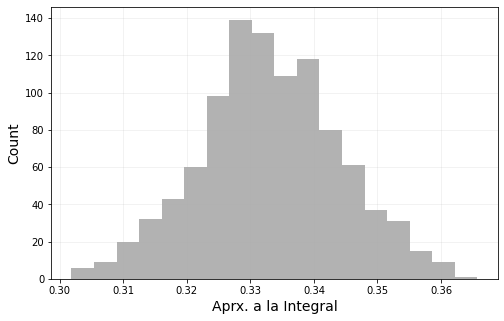

In [57]:
plt.figure(figsize=(8,5))

plt.hist(res, bins=18, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.xlabel('Aprx. a la Integral', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**Estimando** el intervalo de confianza

In [58]:
mean_exp = 1/3
exp_rvs = np.random.exponential(mean_exp, n)

upper_limit = math.inf
lower_limit = 0

In [59]:
def f_scipy_integrand(x):
    return x * 1/mean_exp * math.exp(-1/mean_exp * x)

In [60]:
obj, err = quad(f_scipy_integrand, lower_limit, upper_limit)

In [61]:
h = lambda x: x
h_eval = h(exp_rvs)
h_bar = np.mean(h_eval)

print("error relativo: {:0.4e}".format(compute_error(obj,h_bar )))

error relativo: 4.4783e-02


In [62]:
est_error = np.sqrt((np.mean(h_eval**2) - h_bar**2)/n)

left_interval_point_central_limit  = h_bar - norm.ppf(0.975) * est_error
right_interval_point_central_limit = h_bar + norm.ppf(0.975) * est_error

left_interval_point_central_limit, right_interval_point_central_limit

(0.29935757752244013, 0.3374540380893238)